In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [27]:
# read csv
df = pd.read_csv('Final_student_performance_dataset.csv')

# Data Cleaning

In [28]:
# display rows with missing columns. just to check if there are any missing values
print(df[df.isnull().any(axis=1)])

     Student Name Gender  Attendance  \
252    Student253      F         100   
270    Student271      M          80   
517    Student518      M         100   
541    Student542      F          77   
572    Student573      M          93   
1992  Student1993    NaN          71   
1999  Student2000    NaN          98   

                                               Feedback Study Hours  \
252   The Data Science assignments are challenging b...         NaN   
270   I appreciate the guest lectures by industry pr...         NaN   
517   The Data Science lab sessions provide valuable...         NaN   
541   I wish there were more interactive sessions in...         NaN   
572   I would like more resources for self-study in ...         NaN   
1992  The Data Science assignments are challenging b...          10   
1999                                     Great course!!          13   

      Data Science Marks  
252                   36  
270                   20  
517                   47  
54

In [29]:
# delete rows with missing columns

df = df.dropna()
print(df[df.eq('?').any(axis=1)])
df = df[~df.eq('?').any(axis=1)]
# print again

print(df[df.isnull().any(axis=1)])


    Student Name Gender  Attendance  \
19     Student20      ?          76   
139   Student140      ?          90   
186   Student187      ?          72   
221   Student222      ?          76   
237   Student238      F          91   

                                              Feedback Study Hours  \
19                                      Great course!,           7   
139                              Enjoyed the lectures:           6   
186                                   Too much theory,           8   
221  I find the practical exercises in Data Science...          11   
237  I am enjoying learning about Data Science and ...           ?   

     Data Science Marks  
19                   31  
139                  35  
186                  41  
221                  53  
237                  75  
Empty DataFrame
Columns: [Student Name, Gender, Attendance, Feedback, Study Hours, Data Science Marks]
Index: []


In [30]:
print(df.dtypes)

Student Name          object
Gender                object
Attendance             int64
Feedback              object
Study Hours           object
Data Science Marks     int64
dtype: object


In [31]:
# convert "Study Hours" to numeric
df['Study Hours'] = pd.to_numeric(df['Study Hours'], errors='coerce')

In [32]:
print(df.dtypes)

Student Name          object
Gender                object
Attendance             int64
Feedback              object
Study Hours            int64
Data Science Marks     int64
dtype: object


In [33]:
# check for outliers using IQR for all numeric columns

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Attendance            15.0
Study Hours            8.0
Data Science Marks    37.0
dtype: float64


C:\Users\Hamza\AppData\Local\Temp\ipykernel_16556\2895952987.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


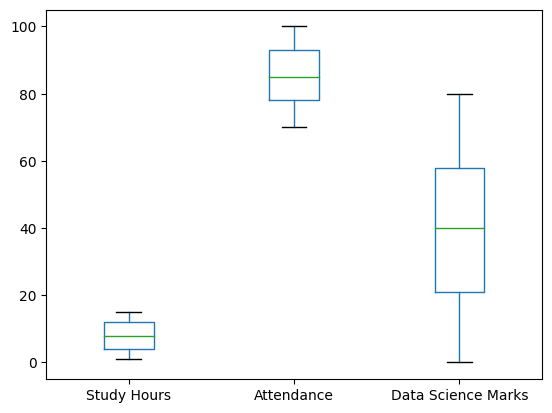

In [34]:
# remove all outliers

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.boxplot(column=['Study Hours', 'Attendance','Data Science Marks'], grid=False)
plt.show()

In [35]:
# check for inconsistent data

print(df['Study Hours'].unique())
print(df['Attendance'].unique())
print(df['Data Science Marks'].unique())

[14  5  3 15 10  8  7  9 12  1  2  4 11 13  6]
[ 70  93  88  74  95  96  90  91  76  80  71  83  79  72  86  97  75  85
  84  99  73  92  98  78  94  77  81  82 100  87  89]
[69 29 17 71 45 36 75 68 77 38 48 59  5 15  6 64 54 73  8 39 50 55 60 14
 47 74 30 57 67 23  9 72 53 11  1 13 65 28 20 66 62 61 27 40 76 58 18 49
 41 35 25 19 32 56 80 46 63 16 22 44 10 26 43 24 51 79 42 52  3 12 31 78
 33  0  7 34 70 21 37  4  2]


In [36]:
# remove inconsistent data

df = df[(df['Study Hours'] >= 0) & (df['Study Hours'] <= 24)]
df = df[(df['Attendance'] >= 0) & (df['Attendance'] <= 100)]
df = df[(df['Data Science Marks'] >= 0) & (df['Data Science Marks'] <= 100)]

In [37]:
# normalize numeric columns

df['Study Hours'] = (df['Study Hours'] - df['Study Hours'].min()) / (df['Study Hours'].max() - df['Study Hours'].min())
df['Attendance'] = (df['Attendance'] - df['Attendance'].min()) / (df['Attendance'].max() - df['Attendance'].min())
df['Data Science Marks'] = (df['Data Science Marks'] - df['Data Science Marks'].min()) / (df['Data Science Marks'].max() - df['Data Science Marks'].min())

print(df)

     Student Name Gender  Attendance  \
0        Student1      F    0.000000   
1        Student2      M    0.766667   
2        Student3      F    0.600000   
3        Student4      F    0.133333   
4        Student5      M    0.833333   
...           ...    ...         ...   
1994  Student1995      M    0.800000   
1995  Student1996      M    0.100000   
1996  Student1997      M    0.100000   
1997  Student1998      F    0.833333   
1998  Student1999      F    0.666667   

                                               Feedback  Study Hours  \
0     The Data Science course content is comprehensi...     0.928571   
1     The Data Science lab sessions provide valuable...     0.285714   
2     I find the practical exercises in Data Science...     0.142857   
3     I liked this course very much. The way it is o...     1.000000   
4     I throughly enjoyed the course and the fact th...     0.642857   
...                                                 ...          ...   
1994  The Data 

In [38]:
# encode categorical columns

import pandas as pd

df_encoded = pd.get_dummies(df, columns=['Attendance', 'Study Hours', 'Data Science Marks'])

print(df_encoded)


     Student Name Gender                                           Feedback  \
0        Student1      F  The Data Science course content is comprehensi...   
1        Student2      M  The Data Science lab sessions provide valuable...   
2        Student3      F  I find the practical exercises in Data Science...   
3        Student4      F  I liked this course very much. The way it is o...   
4        Student5      M  I throughly enjoyed the course and the fact th...   
...           ...    ...                                                ...   
1994  Student1995      M  The Data Science assignments are challenging b...   
1995  Student1996      M  I wish there were more interactive sessions in...   
1996  Student1997      M  I liked this course very much. The way it is o...   
1997  Student1998      F  I find the practical exercises in Data Science...   
1998  Student1999      F  The Data Science course content is comprehensi...   

      Attendance_0.0  Attendance_0.0333333333333333

In [39]:
# text processing on texual data(e-g) comments/feedback from students

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['Feedback'])
print(vectorizer.get_feature_names_out())
print(X.toarray())

['about' 'absolute' 'also' 'always' 'am' 'an' 'and' 'application'
 'applications' 'appreciate' 'are' 'as' 'assignments' 'attempt' 'been'
 'beginner' 'but' 'by' 'certificate' 'challenging' 'cheerful' 'clear'
 'collect' 'comprehensive' 'concepts' 'consistent' 'content' 'contents'
 'could' 'course' 'data' 'different' 'dr' 'ds' 'easily' 'easy' 'engaging'
 'enjoyed' 'enjoying' 'entire' 'everything' 'excited' 'exercises'
 'expected' 'experience' 'explained' 'explanations' 'extremely' 'fact'
 'find' 'five' 'for' 'fundamental' 'further' 'get' 'given' 'good' 'great'
 'guest' 'hands' 'has' 'have' 'helpful' 'her' 'honest' 'hour' 'in'
 'increase' 'industry' 'information' 'inspiring' 'instructor'
 'instructors' 'interactive' 'interest' 'interesting' 'interestingly'
 'into' 'introduction' 'is' 'it' 'its' 'journey' 'knowledge' 'lab'
 'learning' 'lectures' 'lessons' 'like' 'liked' 'looked' 'made' 'make'
 'making' 'material' 'materials' 'me' 'meat' 'more' 'much' 'my' 'needs'
 'never' 'nice' 'not' 'of' 

In [40]:
# remove any special characters from the text

df['Feedback'] = df['Feedback'].str.replace('[^a-zA-Z0-9]', ' ')

C:\Users\Hamza\AppData\Local\Temp\ipykernel_16556\2717774281.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Feedback'] = df['Feedback'].str.replace('[^a-zA-Z0-9]', ' ')


In [41]:
# remove stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
df['Feedback'] = df['Feedback'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
print(df['Feedback'])

0       Data Science course content comprehensive well...
1       Data Science lab sessions provide valuable han...
2           find practical exercises Data Science helpful
3       liked course much way organised collect differ...
4       throughly enjoyed course fact everything expla...
                              ...                        
1994       Data Science assignments challenging rewarding
1995        wish interactive sessions Data Science course
1996    liked course much way organised collect differ...
1997        find practical exercises Data Science helpful
1998    Data Science course content comprehensive well...
Name: Feedback, Length: 1988, dtype: object


In [42]:
# stemming and lemmatization

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df['Feedback'] = df['Feedback'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(df['Feedback'])

df['Feedback'] = df['Feedback'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
print(df['Feedback'])

0       data scienc cours content comprehens well stru...
1       data scienc lab session provid valuabl hand ex...
2                   find practic exercis data scienc help
3       like cours much way organis collect differ dat...
4       throughli enjoy cours fact everyth explain tho...
                              ...                        
1994                   data scienc assign challeng reward
1995              wish interact session data scienc cours
1996    like cours much way organis collect differ dat...
1997                find practic exercis data scienc help
1998    data scienc cours content comprehens well stru...
Name: Feedback, Length: 1988, dtype: object
0       data scienc cours content comprehens well stru...
1       data scienc lab session provid valuabl hand ex...
2                   find practic exercis data scienc help
3       like cours much way organis collect differ dat...
4       throughli enjoy cours fact everyth explain tho...
                            

In [43]:
# convert text to numeric using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Feedback'])
print(vectorizer.get_feature_names_out())
print(X.toarray())

['absolut' 'also' 'alway' 'applic' 'appreci' 'assign' 'attempt' 'beginn'
 'certif' 'challeng' 'cheer' 'clear' 'collect' 'comprehens' 'concept'
 'consist' 'content' 'could' 'cours' 'data' 'differ' 'dr' 'easi' 'easili'
 'engag' 'enjoy' 'entir' 'everyth' 'excit' 'exercis' 'expect' 'experi'
 'explain' 'explan' 'extrem' 'fact' 'find' 'five' 'fundament' 'get'
 'given' 'good' 'great' 'guest' 'hand' 'help' 'honest' 'hour' 'increas'
 'industri' 'inform' 'inspir' 'instructor' 'interact' 'interest'
 'interestingli' 'introduct' 'journey' 'knowledg' 'lab' 'learn' 'lectur'
 'lesson' 'like' 'look' 'made' 'make' 'materi' 'meat' 'much' 'need'
 'never' 'nice' 'one' 'opinion' 'organis' 'overal' 'peopl' 'person' 'piec'
 'poi' 'point' 'poor' 'practic' 'proceed' 'profession' 'program' 'provid'
 'qualiti' 'readi' 'recruit' 'relat' 'relev' 'resourc' 'reward' 'road'
 'scienc' 'scientist' 'self' 'session' 'sign' 'simplifi' 'someon'
 'speaker' 'start' 'step' 'structur' 'studi' 'subject' 'suitabl' 'taught'
 'terr

In [44]:
# save all cleaned data in new csv

df.to_csv('cleaned_student_performance_dataset.csv', index=False)

# EDA

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


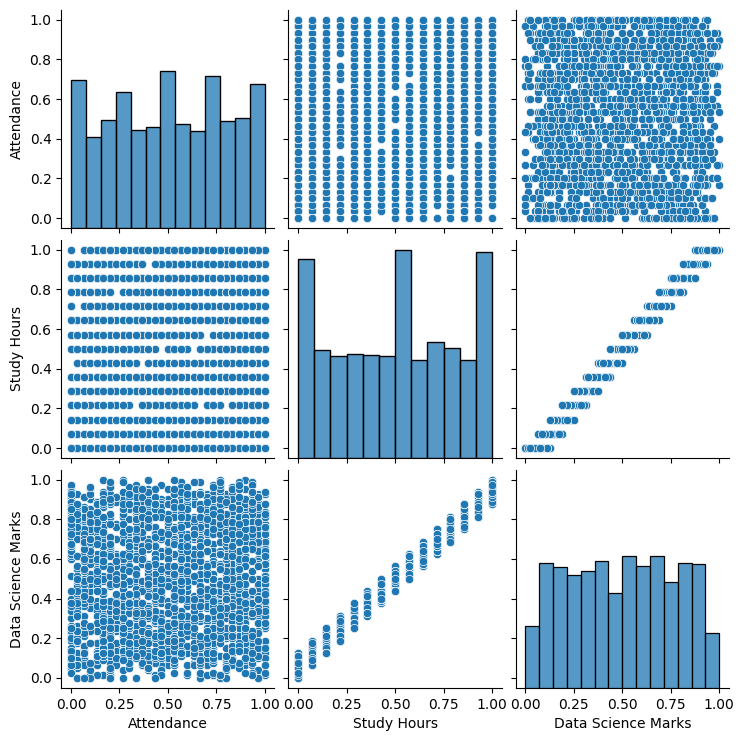

In [45]:
# conduct explorataory data analysis to understand the distribution of variables, corelation between features, and identify potential trends or patterns.
# visualize then after that using scatterplot, histogram and other appropriate plots

import seaborn as sns

sns.pairplot(df)
plt.show()

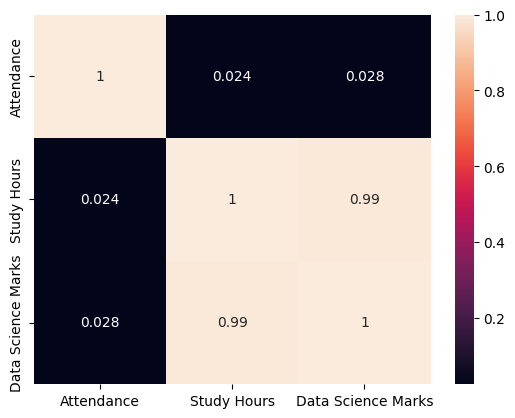

In [46]:
# check for correlation between features
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

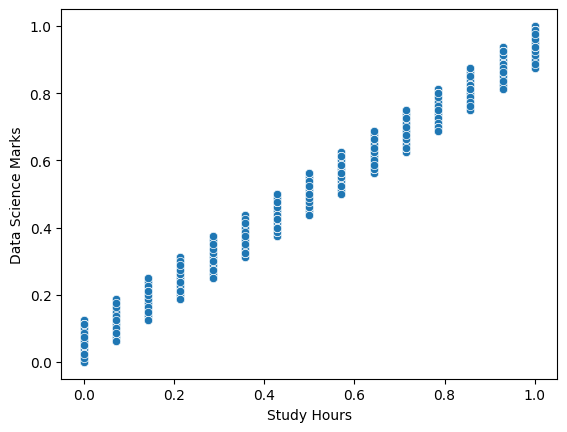

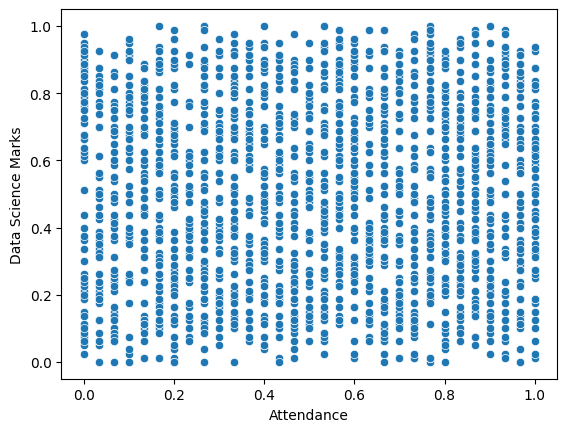

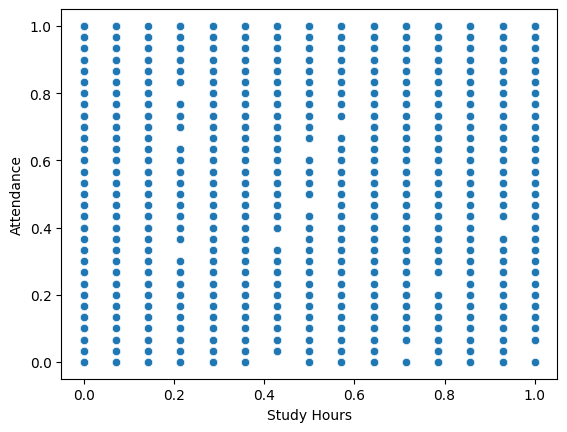

In [47]:
# check for trends or patterns
sns.scatterplot(x='Study Hours', y='Data Science Marks', data=df)
plt.show()

sns.scatterplot(x='Attendance', y='Data Science Marks', data=df)
plt.show()

sns.scatterplot(x='Study Hours', y='Attendance', data=df)
plt.show()

# Probability Distribution

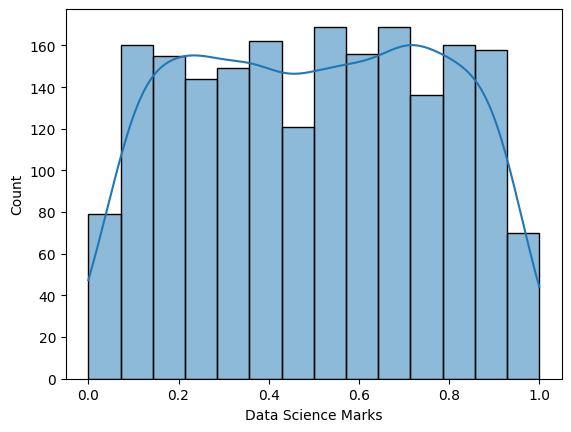

In [48]:
# check for normal distribution and tell if the marks are normally distributed or not

from scipy.stats import shapiro

sns.histplot(df['Data Science Marks'], kde=True)
plt.show()

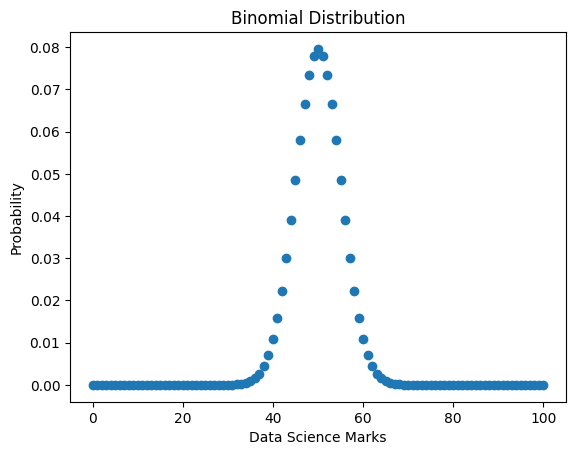

In [49]:
# check binommial distribution
from scipy.stats import binom

data = df['Data Science Marks']
n = 100
p = 0.5
x = np.arange(0, 101)
y = binom.pmf(x, n, p)
plt.plot(x, y, 'o')
plt.title('Binomial Distribution')
plt.xlabel('Data Science Marks')
plt.ylabel('Probability')
plt.show()

# Linear Regression

In [50]:
X = df[['Study Hours', 'Attendance']]
y = df['Data Science Marks']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Mean Squared Error: 0.0015020209085148388
R2 Score: 0.9795625701956044
Mean Absolute Error: 0.03361356491190585


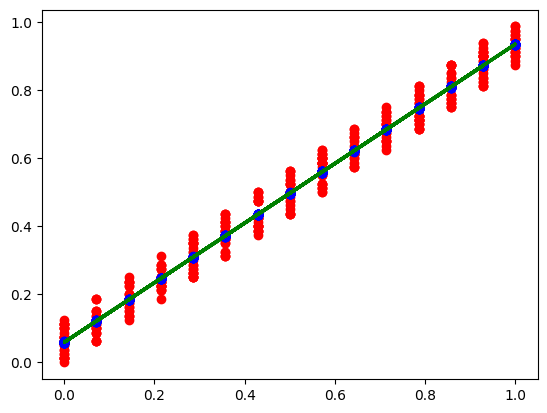

In [55]:
# visualize the model predictions along with the actual values and regression line

plt.scatter(X_test['Study Hours'], y_test, color='red')
plt.scatter(X_test['Study Hours'], y_pred, color='blue')
plt.plot(X_test['Study Hours'], y_pred, color='green')
plt.show()

In [56]:
# predicted vs original values, mse, r2 score, save in csv

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred})
df_results.to_csv('predicted_vs_original_values.csv', index=False)

# Hypothesis Testing

In [57]:
from scipy.stats import ttest_ind

study_hours = df['Study Hours']
attendance = df['Attendance']
marks = df['Data Science Marks']

In [58]:
# check corelation between study hours and marks and tell if it is significant or not

t_stat, p_value = ttest_ind(study_hours, marks)
print('T-Statistic:', t_stat)
print('P-Value:', p_value)

# if p_value < 0.05:
#     print('There is a significant relationship between study hours and marks')
# else:
#     print('There is no significant relationship between study hours and marks')
    

T-Statistic: 0.27889325411300464
P-Value: 0.7803412573022613


In [59]:
# check corelation between attendance and marks and tell if it is significant or not

t_stat, p_value = ttest_ind(attendance, marks)
print('T-Statistic:', t_stat)
print('P-Value:', p_value)

# if p_value < 0.05:
#     print('There is a significant relationship between attendance and marks')
# else:
#     print('There is no significant relationship between attendance and marks')
    

T-Statistic: 0.7883336625234297
P-Value: 0.4305485840348531


# Text Processing and Sentiment Analysis

In [60]:
# Process feedback data to extract insights

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['Feedback'])
print(vectorizer.get_feature_names_out())
print(X.toarray())

['absolut' 'also' 'alway' 'applic' 'appreci' 'assign' 'attempt' 'beginn'
 'certif' 'challeng' 'cheer' 'clear' 'collect' 'comprehens' 'concept'
 'consist' 'content' 'could' 'cours' 'data' 'differ' 'dr' 'easi' 'easili'
 'engag' 'enjoy' 'entir' 'everyth' 'excit' 'exercis' 'expect' 'experi'
 'explain' 'explan' 'extrem' 'fact' 'find' 'five' 'fundament' 'get'
 'given' 'good' 'great' 'guest' 'hand' 'help' 'honest' 'hour' 'increas'
 'industri' 'inform' 'inspir' 'instructor' 'interact' 'interest'
 'interestingli' 'introduct' 'journey' 'knowledg' 'lab' 'learn' 'lectur'
 'lesson' 'like' 'look' 'made' 'make' 'materi' 'meat' 'much' 'need'
 'never' 'nice' 'one' 'opinion' 'organis' 'overal' 'peopl' 'person' 'piec'
 'poi' 'point' 'poor' 'practic' 'proceed' 'profession' 'program' 'provid'
 'qualiti' 'readi' 'recruit' 'relat' 'relev' 'resourc' 'reward' 'road'
 'scienc' 'scientist' 'self' 'session' 'sign' 'simplifi' 'someon'
 'speaker' 'start' 'step' 'structur' 'studi' 'subject' 'suitabl' 'taught'
 'terr

In [61]:
# conduct sentiment analysis using textblob to determine the sentiment of the feedback provided by students. return positive or negative

from textblob import TextBlob

df['Sentiment'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
print(df['Sentiment'])

0       Negative
1       Negative
2       Negative
3       Positive
4       Positive
          ...   
1994    Negative
1995    Negative
1996    Positive
1997    Negative
1998    Negative
Name: Sentiment, Length: 1988, dtype: object


In [62]:
# count the number of positive and negative feedbacks

positive_feedbacks = df[df['Sentiment'] == 'Positive']
negative_feedbacks = df[df['Sentiment'] == 'Negative']

print('Number of Positive Feedbacks:', len(positive_feedbacks))
print('Number of Negative Feedbacks:', len(negative_feedbacks))

Number of Positive Feedbacks: 915
Number of Negative Feedbacks: 1073


# Visualize and Reporting

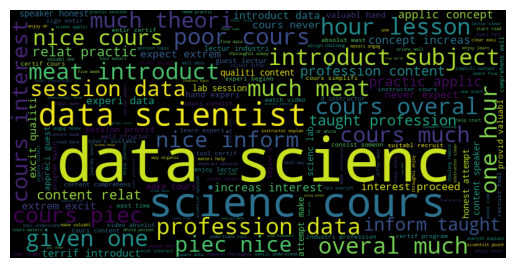

In [63]:
# create visualizations

# 1. WordCloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Feedback']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

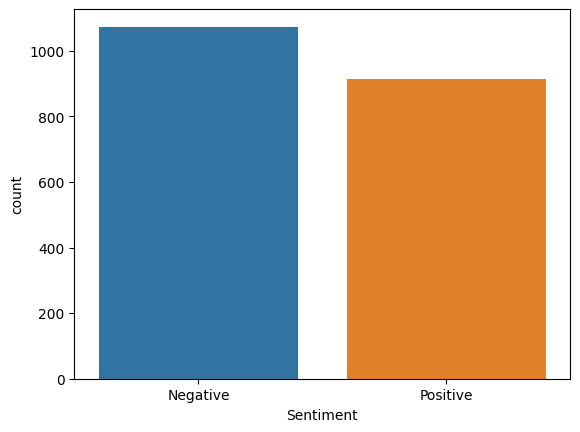

In [64]:
# 2. Sentiment Plots

sns.countplot(x='Sentiment', data=df)
plt.show()